# Klasifikasi Emosi berdasarkan Suara Audio

Kode notebook ini dijalankan pada platform Kaggle, sehingga pada kode berikut digunakan untuk memuat dataset yang hendak dipakai pada proyek ini.

# Informasi Dataset :

Nama : **Toronto emotional speech set (TESS)** 
URL  : [Dataset TESS](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)


Terdapat satu set 200 kata target yang diucapkan dalam frasa "Say the word _' oleh dua aktris (berusia 26 dan 64 tahun) dan rekaman dibuat dari set yang menggambarkan masing-masing dari tujuh emosi (marah, jijik, takut, bahagia, terkejut, sedih, dan netral). Ada 2800 data (file audio) secara total.

Set data tersebut disusun sedemikian rupa sehingga masing-masing dari dua aktor wanita dan emosi mereka terkandung dalam foldernya sendiri. Dan di dalamnya, semua 200 file audio kata target dapat ditemukan. Format file audio adalah forma`WAV`.AV

# Pre-processing Dataset

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

ROOT_DIR = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/"
os.listdir(ROOT_DIR)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['YAF_fear',
 'OAF_angry',
 'OAF_Fear',
 'OAF_disgust',
 'OAF_neutral',
 'YAF_angry',
 'OAF_Sad',
 'YAF_disgust',
 'YAF_neutral',
 'OAF_Pleasant_surprise',
 'YAF_happy',
 'OAF_happy',
 'YAF_sad',
 'YAF_pleasant_surprised']

**Contoh isi file**

kode ini digunakan untuk melihat sebagian isi folder YAF_fear.

In [4]:
print(os.listdir(ROOT_DIR+"YAF_fear")[:5])

['YAF_home_fear.wav', 'YAF_youth_fear.wav', 'YAF_near_fear.wav', 'YAF_search_fear.wav', 'YAF_pick_fear.wav']


**Jumlah file per folder emosi**

Kode ini akan menghitung jumlah file yang ada di dalam setiap folder, kemudian menghitung total agregat data tersebut. Ini berguna untuk mengetahui distribusi jumlah file tiap folder dan untuk mengetahui `class` data apa saja yang ada pada dataset ini.

sebagai catatan:
seluruh file audio ini bertipe `.wav`

In [5]:
count = 0
for i in os.listdir(ROOT_DIR):
    len_dir = len(os.listdir(ROOT_DIR+i)) 
    print(f"Jumlah file DIR : {i} -> {len_dir}")
    count += len_dir

print(f"Total : {count}")

Jumlah file DIR : YAF_fear -> 200
Jumlah file DIR : OAF_angry -> 200
Jumlah file DIR : OAF_Fear -> 200
Jumlah file DIR : OAF_disgust -> 200
Jumlah file DIR : OAF_neutral -> 200
Jumlah file DIR : YAF_angry -> 200
Jumlah file DIR : OAF_Sad -> 200
Jumlah file DIR : YAF_disgust -> 200
Jumlah file DIR : YAF_neutral -> 200
Jumlah file DIR : OAF_Pleasant_surprise -> 200
Jumlah file DIR : YAF_happy -> 200
Jumlah file DIR : OAF_happy -> 200
Jumlah file DIR : YAF_sad -> 200
Jumlah file DIR : YAF_pleasant_surprised -> 200
Total : 2800


**play beberapa audio**

Kode ini digunakan untuk memutar file audio dari beberapa folder yang berbeda, sebagai sample untuk mengetahui bunyi masing-masing audio tersebut.

In [6]:
from IPython.display import Audio
import librosa

y, sr = librosa.load(ROOT_DIR + "YAF_fear/" + os.listdir(ROOT_DIR+"YAF_fear")[10])
Audio(data=y, rate=sr)

**contoh audio Angry**

In [7]:
y, sr = librosa.load(ROOT_DIR + "OAF_angry/" + os.listdir(ROOT_DIR+"OAF_angry")[10])
Audio(data=y, rate=sr)

**Contoh audio OAF Fear**

In [8]:
y, sr = librosa.load(ROOT_DIR + "OAF_Fear/" + os.listdir(ROOT_DIR+"OAF_Fear")[10])
Audio(data=y, rate=sr)

**Contoh audio OAF disgust**

In [9]:
y, sr = librosa.load(ROOT_DIR + "OAF_disgust/" + os.listdir(ROOT_DIR+"OAF_disgust")[10])
Audio(data=y, rate=sr)

**Contoh audio OAF Neutral**

In [10]:
y, sr = librosa.load(ROOT_DIR + "OAF_neutral/" + os.listdir(ROOT_DIR+"OAF_neutral")[10])
Audio(data=y, rate=sr)

**Contoh audio YAF Angry**

In [11]:
y, sr = librosa.load(ROOT_DIR + "YAF_angry/" + os.listdir(ROOT_DIR+"YAF_angry")[10])
Audio(data=y, rate=sr)

**Contoh audio OAF Surprise**

In [12]:
y, sr = librosa.load(ROOT_DIR + "OAF_Pleasant_surprise/" + os.listdir(ROOT_DIR+"OAF_Pleasant_surprise")[11])
Audio(data=y, rate=sr)

**Contoh audio OAF Sad**

In [13]:
y, sr = librosa.load(ROOT_DIR + "OAF_Sad/" + os.listdir(ROOT_DIR+"OAF_Sad")[11])
Audio(data=y, rate=sr)

> **Data Preparation**

Sebelum data audio ini diproses lebih lanjut, saya mengorganisasikan setiap file ke direktori yang sesuai dengan jenis file-nya, karena terdapat 2 jenis tipe emosi yang berbeda folder misal: `YAF_fear` dan `OAF_fear` kedua isi folder tersebut sepertinya dilafalkan oleh orang yang berbeda, meskipun demikian isi folder tersebut tetaplah akan bertipe emosi `fear` sehingga alangkah baiknya saya menyalin kedua isi folder tersebut dan meletakkanya di direktori yang sama misal `Fear`. Hal ini akan dilakukan pada seluruh isi folder dengan tipe emosi yang sama.

Untuk melakukan hal ini saya membuat sebuah function `copy_to_dir` untuk menyalin dan meletakan setiap file ke masing-masing direktori yang baru.

In [14]:
import shutil 
import matplotlib.pyplot as plt

"""
   function menggabungkan dahulu tipe emosi yang sama ke dalam satu folder.
"""

def copy_to_dir(dir_ori, dir_dst="dataset_audio"):
    os.makedirs(dir_dst, exist_ok=True)
    for filename in os.listdir(dir_ori):
        file_path = os.path.join(dir_ori, filename)
        if os.path.isfile(file_path):  # Cek kalo itu file, bukan sub-folder
            shutil.copy(file_path, dir_dst) 

"""
    membuat direktori baru untuk memindahkan file-file tersebut.
"""
if os.path.isdir("dataset_audio"):
    for i in os.listdir(ROOT_DIR):
        print(os.path.join(ROOT_DIR, i))

**Memindahkan file ke direktori baru.**

In [15]:
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear", "dataset_audio/fear")

In [16]:
"""
    copy semua file ke folder yang baru.
"""

copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry", "dataset_audio/angry")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear", "dataset_audio/fear")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust", "dataset_audio/disgust")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral", "dataset_audio/neutral")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_angry", "dataset_audio/angry")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Sad", "dataset_audio/sad")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust", "dataset_audio/disgust")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_neutral", "dataset_audio/neutral")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Pleasant_surprise", "dataset_audio/pleasant_surprise")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_happy", "dataset_audio/happy")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy", "dataset_audio/happy")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_sad", "dataset_audio/sad")
copy_to_dir("/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised", "dataset_audio/pleasant_surprise")

Setelah menyalin semua audio ke direktori yang baru, yaitu : `dataset_audio`, maka direktori ini yang akan dijadikan ROOT direktori kedepannya.

In [17]:
"""
    atur sebagai ROOT direktori yang baru.
"""

ROOT_DIR = "dataset_audio"

kelas =  os.listdir(ROOT_DIR)
kelas

['disgust', 'fear', 'angry', 'happy', 'pleasant_surprise', 'sad', 'neutral']

**Menyimpan file_path dan label ke list**

Selanjutnya saya akan memasangkan setiap file dengan label nya masing-masing, untuk itu saya akan menyimpan terlebih dahulu lokasi file `(file path)`  dan label-nya ke variabel `list` yang nantinya akan diubah ke bentuk DataFrame pandas.

In [18]:
"""
    kode untuk menyimpan file-path dan label nya ke list.
"""

audio_paths = []
labels = []

for folder in os.listdir(ROOT_DIR):
    folder_path = os.path.join(ROOT_DIR, folder)
    if os.path.isdir(folder_path): 
        label = folder.split('_')[-1]  # Ambil emosi dari nama folder (contoh: "YAF_fear" -> "fear")
        for filename in os.listdir(folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(folder_path, filename)
                audio_paths.append(file_path)
                labels.append(label)

**Membuat DataFrame**

Hasil dari kode sebelumnya yaitu array-array list tersebut akan digunakan untuk membuat DataFrame pandas, agar kedepan mudah untuk dilakukan manipulasi data.

In [19]:
"""
    membuat dataframe dengan kolom nama file_path dan label nya
"""

# Dataframe untuk organisasi data
data = pd.DataFrame({
    'file_path': audio_paths,
    'label': labels
})

# Cek data
print(f"Total files: {len(data)}")
data.head()

Total files: 2800


,file_path,label
0,dataset_audio/disgust/YAF_cool_disgust.wav,disgust
1,dataset_audio/disgust/YAF_such_disgust.wav,disgust
2,dataset_audio/disgust/YAF_loaf_disgust.wav,disgust
3,dataset_audio/disgust/YAF_keg_disgust.wav,disgust
4,dataset_audio/disgust/OAF_peg_disgust.wav,disgust


# Explorasi Data

**Data Exploration**

Untuk plot beberapa file sekaligus saya mengambil setiap satu file path dari semua kategori emosi dan disimpan ke sebuah list.

In [20]:
"""
    mengambil contoh file audio untuk di plot.
"""

contoh_file_path = [ os.path.join(ROOT_DIR, os.path.join(x, os.listdir(os.path.join(ROOT_DIR, x))[0]) )  for x in kelas ]
contoh_file_path

['dataset_audio/disgust/YAF_cool_disgust.wav',
 'dataset_audio/fear/OAF_mode_fear.wav',
 'dataset_audio/angry/OAF_life_angry.wav',
 'dataset_audio/happy/YAF_pearl_happy.wav',
 'dataset_audio/pleasant_surprise/OAF_wheat_ps.wav',
 'dataset_audio/sad/YAF_youth_sad.wav',
 'dataset_audio/neutral/YAF_seize_neutral.wav']

**Plot Gelombang Audio**

Kode dibawah digunakan untuk plot setiap file yang ada di list sebelumnya dengan menggunakan `plt.subplots` agar menggunakan mode Grid pada matplotlib, sehingga dapat melihat hasil grafik spektrum gelombang audio setiap file sample yang telah diambil tersebut.

Grafik ini mengukur Amplitudo gelombang terhadap waktu (time) setiap audio jadi data ini masih dalam domain waktu, nantinya kita akan mengubah data ini ke domain frekuensi agar lebih banyak mendapatkan `insight`. dapat dilihat pada contoh data sample ini bahwa pada audio jenis neutral spektrum gelombang cenderung lebih stabil pada panjang amplitudo-nya, sedangkan pada kategori emosi lain bentuk spektrum gelombang lebih bervariasi.

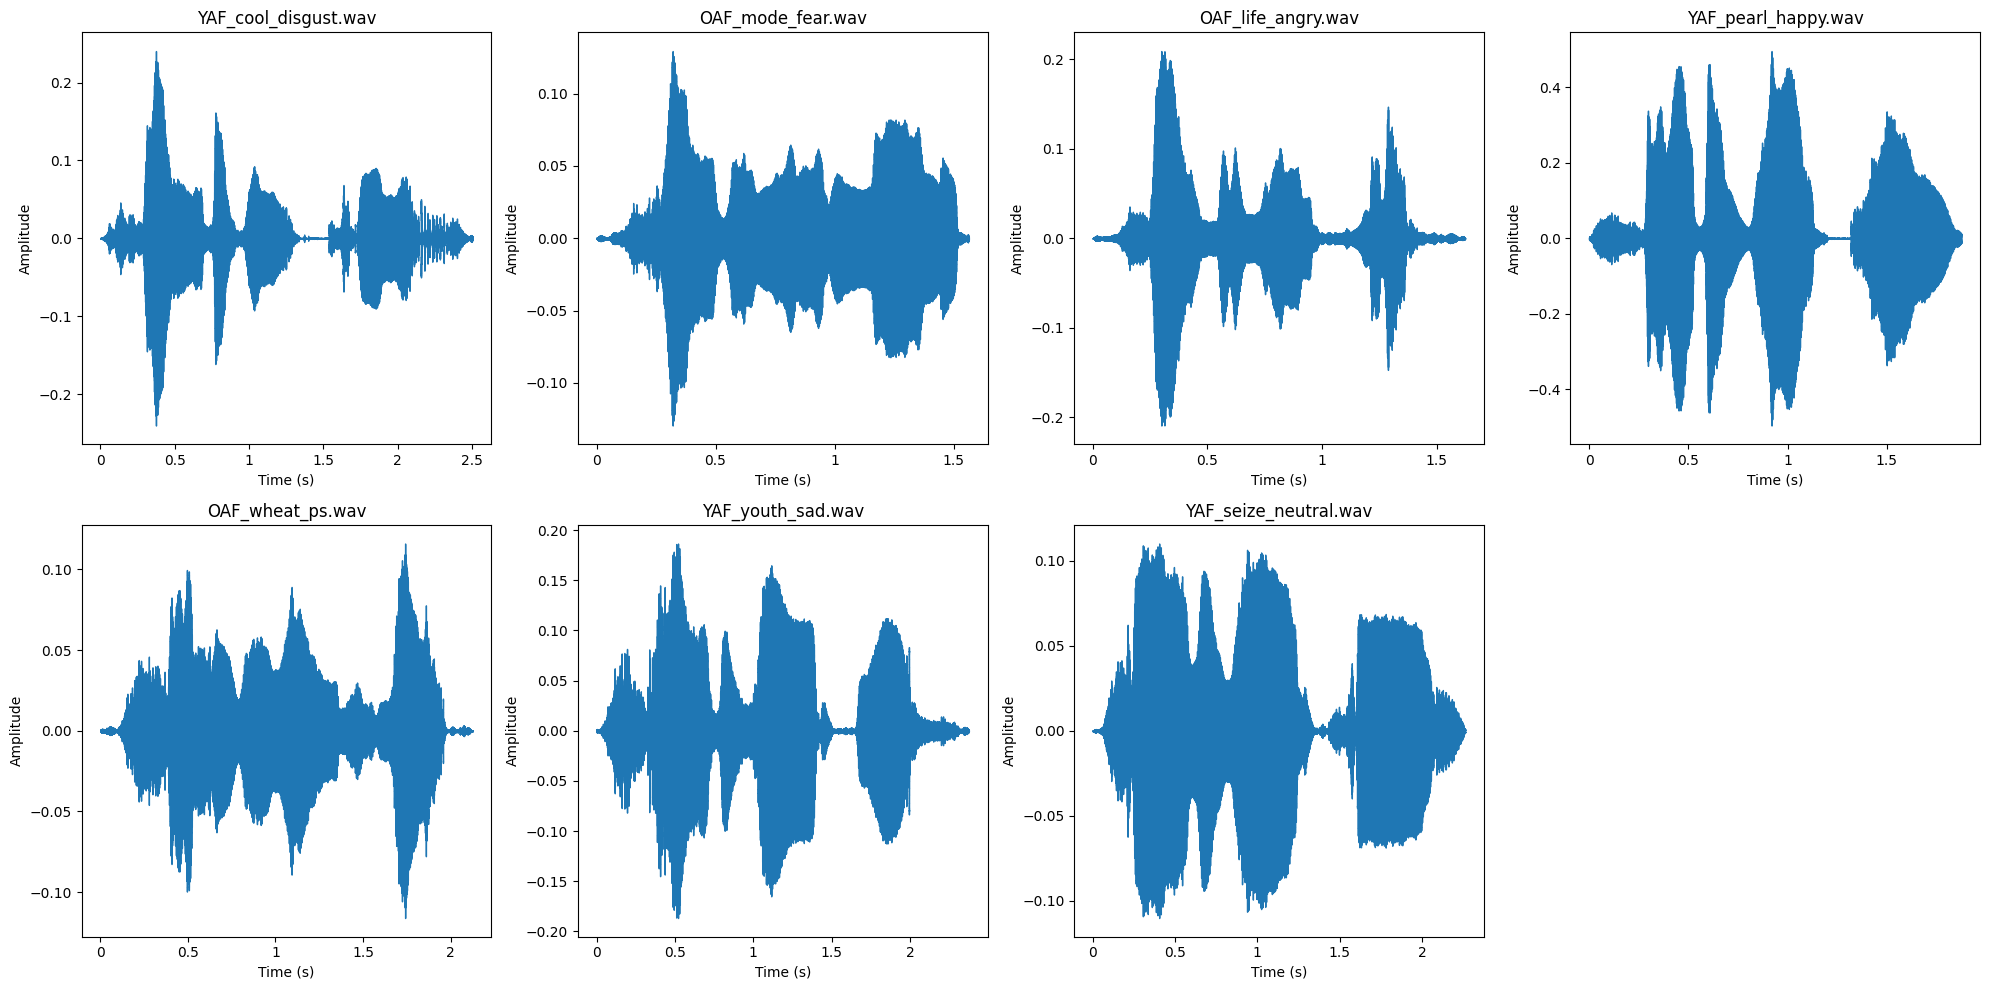

In [21]:
import librosa.display

"""
    plot data gelombang sinyal audio
"""

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, file_path in enumerate(contoh_file_path):
    y, sr = librosa.load(file_path)    
    # Plot wave plot di subplot
    librosa.display.waveshow(y, sr=sr, ax=axes[i])
    # Nama file sebagai judul
    axes[i].set_title(file_path.split('/')[-1])  
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Amplitude")

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

**Plot MFCC (Mel Frequency Cepstral Coefficient) Spectogram**

Untuk mengolah data sinyak audio ini kita perlu mengubah data yang masih dalam domain waktu untuk menjadi data dalam domain frekuensi, alasannya karena kita dapat mudah menemukan pola-pola frekuensi yang berkarakter, ini sama halnya dengan cara telinga kita mendengar yaitu kita akan peka terhadap bermacam-macam pola frekuensi dari rambatan suara tersebut ketimbang memikirkan amplitudio sinyal suara tiap waktu.

`MFCC` (**Mel Frequency Cepstral Coefficient**) merupakan salah satu bentuk data sinyal audio dalam bentuk domain frekuensi dengan rentang skala Mel, skala Mel ini adalah skala frekuensi yang didasarkan pada cara manusia mendengar suara.

Kode ini akan menampilkan grafik map dari MFCC tiap sample file audio. koefisien MFCC yang diambil berjumlah 13 koefisien karena biasanya koefisien lebih dari 13 adalah sebuah noise, pada grafik tersebut juga terlihat rentang nilai desible antara 100 db - 600 db.



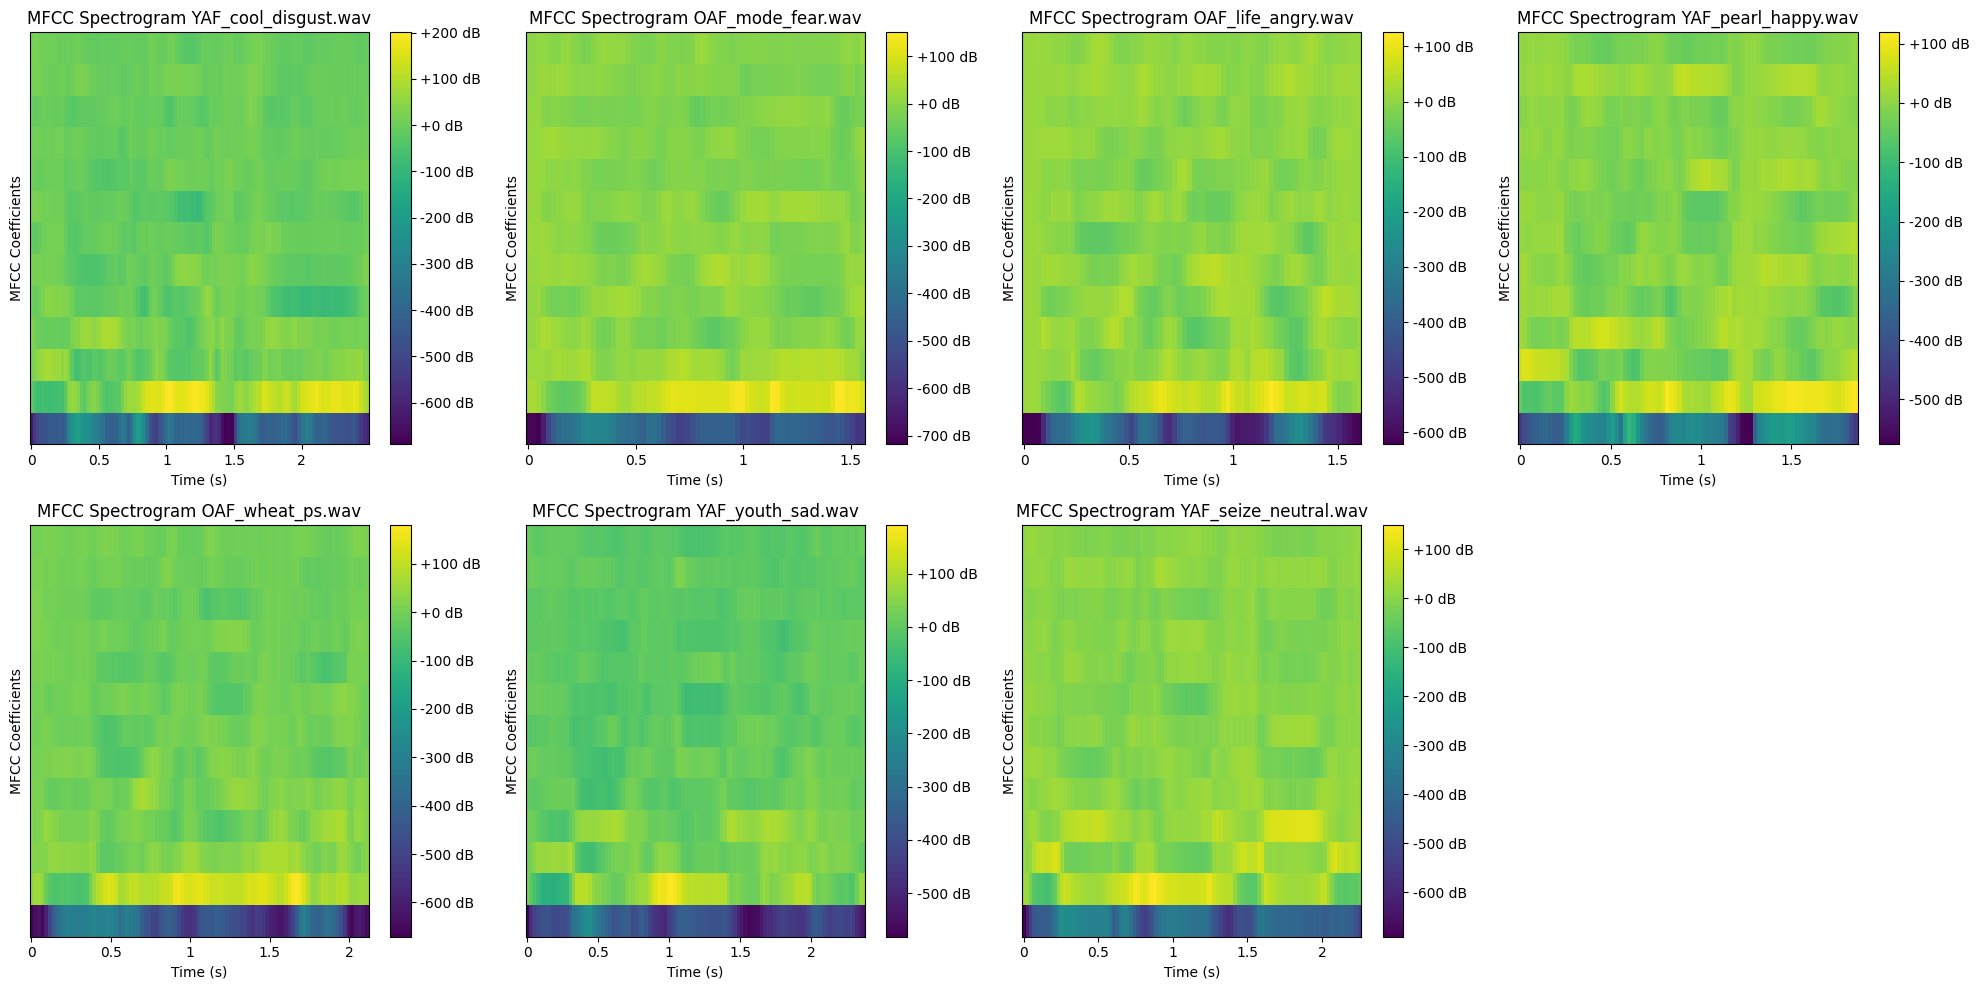

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  

for i, file_path in enumerate(contoh_file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # Plot MFCC Spectogram
    img = librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='viridis', ax=axes[i])
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')
    axes[i].set_title("MFCC Spectrogram " +  file_path.split('/')[-1])
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("MFCC Coefficients")

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

**Melihat Distribusi Durasi Audio**

Pada bagian ini saya ingin melihat distribusi durasi audio pada dataset, dapat dilihat distribusi audio berdistribusi normal, dengan rentang durasi paling pendek yaitu 1.2 detik dan paling panjang 3 detik.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


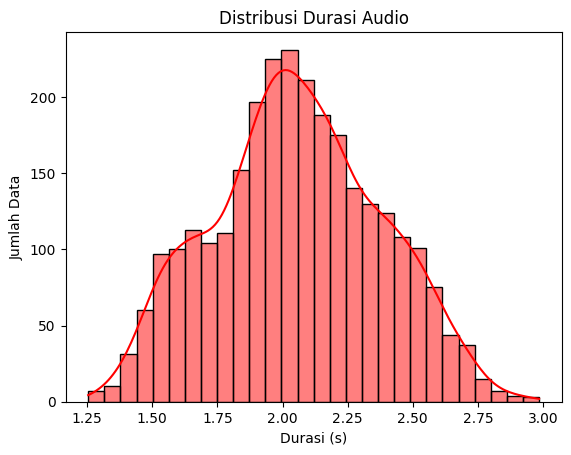

In [23]:
import seaborn as sns

durations = []
for i, file_path in enumerate(data.file_path):
    y, sr = librosa.load(file_path)
    durations.append(librosa.get_duration(y=y, sr=sr))

sns.histplot(durations, kde=True, color='red')
plt.xlabel("Durasi (s)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Durasi Audio")
plt.show()

**Melihat Distribusi Roll-Off Audio**
Untuk mengetahui dimana sebagian besar energi berada

Eksplorasi selanjutnya yaitu untuk melihat distribusi data `Spectral Roll-Off` ini merupakan data yang mengindikasikan frekuensi dengan energi nya 95% di bawah normal.
dapat dilihat data ini juga terdistribusi normal, dengan jumlah data Roll-off terbanyak diantara 4000-5000 Hz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


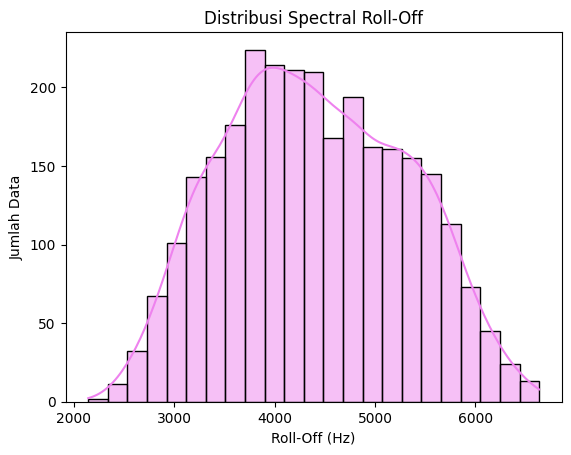

In [24]:
roll_off = []
for i, file_path in enumerate(data.file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    roll_off.append(librosa.feature.spectral_rolloff(y=y, sr=sr).mean())

sns.histplot(roll_off, kde=True, color='violet')
plt.xlabel("Roll-Off (Hz)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Spectral Roll-Off")
plt.show()

Selanjutnya kita akan melihat data tentang tingkat `Zero Crossing Rate`, yaitu seberapa banyak sinyal audio melewati nilai 0, misalkan dari tingkat positif ke nol lalu ke negatif dan juga sebaliknya. semakin banyak nilai ZCR ini berarti tingkat frekuensi juga tinggi, suara ber-intonasi dan tekanan tinggi, dan sebaliknya

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


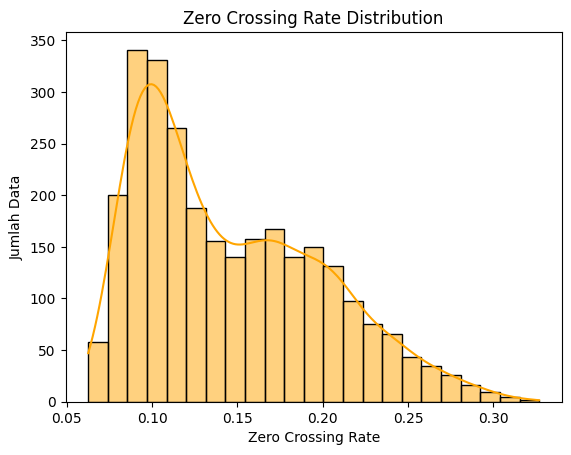

In [25]:
z_cross = []
for i, file_path in enumerate(data.file_path):
    y, sr = librosa.load(file_path)
    zcr = librosa.feature.zero_crossing_rate(y)
    z_cross.append(zcr.mean())

sns.histplot(z_cross, kde=True, color='orange')
plt.xlabel("Zero Crossing Rate")
plt.ylabel("Jumlah Data")
plt.title("Zero Crossing Rate Distribution")
plt.show()

Kode ini digunakan untuk melihat distribusi pusat massa sinyal atau `Spectral Centroid`, nilai ini adalah frekuensi rata-rata sinyal yang mengindikasikan karakteristik suara yaitu bernada tinggi atau rendah. 

Pada grafik di bawah dapat terlihat mayoritas pusat massa audio pada dataset ini pada frekuensi antara 2000-2500 Hz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


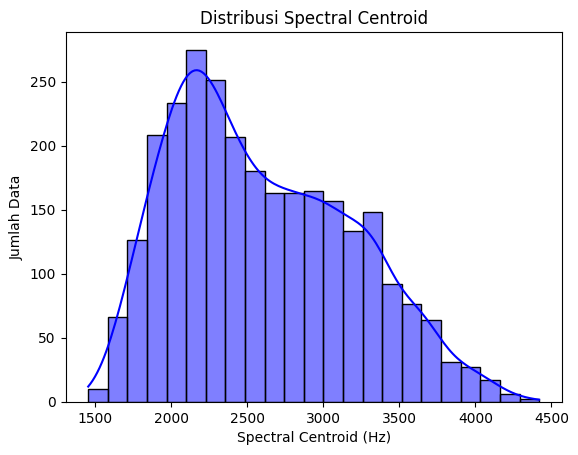

In [26]:
centroid = []
for i, file_path in enumerate(data.file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    centroid.append(librosa.feature.spectral_centroid(y=y, sr=sr).mean())

sns.histplot(centroid, kde=True, color='blue')
plt.xlabel("Spectral Centroid (Hz)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Spectral Centroid")
plt.show()

`Spectral Contrast` merupakan data tekait perbedaan energi frekuensi tinggi dan rendah pada sinyal suara. pada grafik terlihat berdistribusi normal, dengan nilai selisih paling banyak ada pada rentang 24-26.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


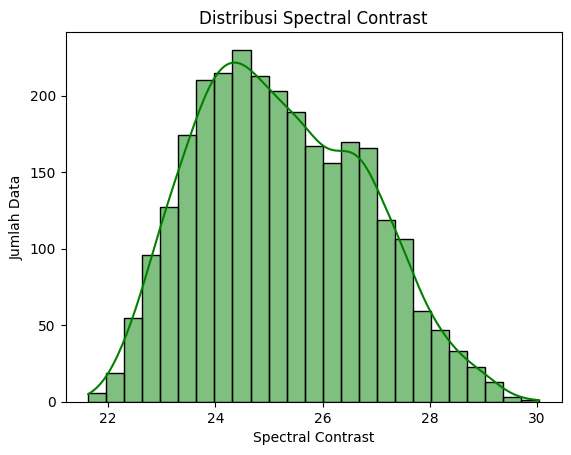

In [27]:
contrast = []
for i, file_path in enumerate(data.file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    contrast.append(librosa.feature.spectral_contrast(y=y, sr=sr).mean())

sns.histplot(contrast, kde=True, color='green')
plt.xlabel("Spectral Contrast")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Spectral Contrast")
plt.show()

Pada bagian ini digunakan untuk melihat tingkat distribusi `Spectral Bandwidth` atau lebar rentang frekuensi sinyal audio. pada grafik di bawah terdistribusi normal dengan titik data terbanyak pada rentang frekuensi 2200 Hz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


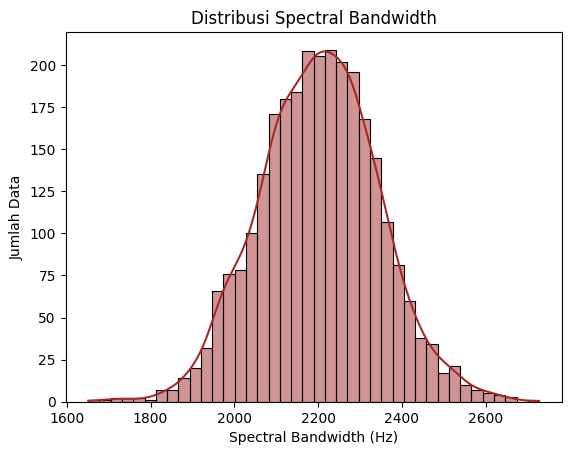

In [30]:
bandwidth = []
for i, file_path in enumerate(data.file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    bandwidth.append(librosa.feature.spectral_bandwidth(y=y, sr=sr).mean())

sns.histplot(bandwidth, kde=True, color='brown')
plt.xlabel("Spectral Bandwidth (Hz)")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Spectral Bandwidth")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


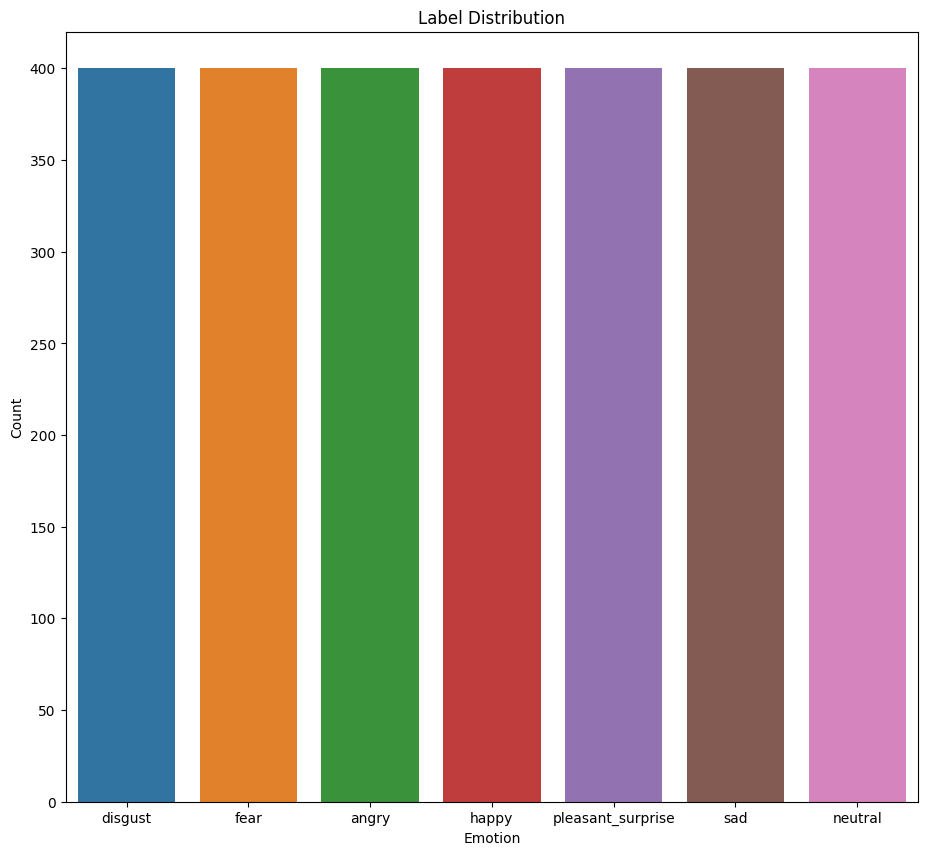

In [31]:
label_counts = [len(os.listdir(os.path.join(ROOT_DIR, x))) for x in kelas]
plt.figure(figsize=(11, 10))
sns.barplot(x=kelas, y=label_counts)
plt.title("Label Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# Feature Engineering

Pada kode di bawah adalah fungsi `extract_feature` untuk mengekstrak nilai berikut:


1. rata-rata 13 koefisien MFCC
2. rata-rata spectral centroid
3. rata-rata spectral contrast
4. rata-rata spectral bandwidth
5. mean zero crossing rate
6. mean spectral roll off 


In [36]:
def extract_feature(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = mfcc.mean(axis=1)
    zcr = librosa.feature.zero_crossing_rate(y=y).mean()
    roll_off = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()

    features = mfcc_mean.tolist() + [zcr, roll_off, spectral_centroid, spectral_contrast, spectral_bandwidth]
    return features

In [37]:
"""
    contoh hasil ekstraksi fitur memakai fungsi tersebut.
"""
contoh = extract_feature(data.file_path[0])
print(contoh)
len(contoh)


[-414.1748046875, 83.77420806884766, 6.053292274475098, 21.471818923950195, -20.95804214477539, -1.229934811592102, -3.3790338039398193, -16.890663146972656, -3.287541627883911, -2.1963858604431152, -9.936028480529785, 1.1677708625793457, -6.4441304206848145, 0.1451144748263889, 4352.398681640625, 2522.832679570018, 23.16542262053634, 2020.1948868388213]


18

Kode di bawah digunakan untuk menjalankan operasi fungsi `extract_feature` ke semua data kolom file_path Data Frame dan kemudian menyimpannya menjadi kolom-kolom/feature sesuai yang telah di-ekstrak.

In [38]:
features = data['file_path'].apply(lambda x : extract_feature(x))
kolom_features = pd.DataFrame(features.tolist())
kolom_features.columns = [f'mfcc_{i}' for i in range(13)] + ['zcr', 'spectral_rolloff', 'spectral_centroid', 'spectral_bandwidth', 'spectral_contrast']
data = pd.concat([data, kolom_features], axis=1)

kode untuk menampilkan data frame, dapat dilihat terdapat 18 kolom pada dataframe, tapi yang akan digunakan kolom kecuali kolom `file_path`. 

In [39]:
data.head()

,file_path,label,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,zcr,spectral_rolloff,spectral_centroid,spectral_bandwidth,spectral_contrast
0,dataset_audio/disgust/YAF_cool_disgust.wav,disgust,-414.174805,83.774208,6.053292,21.471819,-20.958042,-1.229935,-3.379034,-16.890663,-3.287542,-2.196386,-9.936028,1.167771,-6.444130,0.145114,4352.398682,2522.832680,23.165423,2020.194887
1,dataset_audio/disgust/YAF_such_disgust.wav,disgust,-414.065155,35.342926,-0.902508,15.319044,-10.758162,0.599639,-7.669867,-9.958431,-4.176933,1.734143,-6.628315,0.586164,-5.965567,0.276206,5553.132218,3706.181756,22.585626,2045.454122
2,dataset_audio/disgust/YAF_loaf_disgust.wav,disgust,-389.576569,67.355965,-1.299663,13.635043,-16.633665,-1.246321,-4.563192,-14.913487,-9.660592,-3.935016,-6.260524,0.795046,-7.113515,0.188579,4900.341797,2923.226816,23.261979,2096.215087
3,dataset_audio/disgust/YAF_keg_disgust.wav,disgust,-390.250610,53.526520,-1.898674,28.933302,-4.077490,-10.880424,-13.930776,-10.125544,-8.995330,-4.342734,-9.926263,5.526996,-10.342362,0.181992,5284.040270,3134.387534,22.807202,2236.834102
4,dataset_audio/disgust/OAF_peg_disgust.wav,disgust,-449.097687,69.239906,5.952955,5.597575,14.205786,0.174597,-16.741772,-2.745457,-11.882961,4.558856,-13.865229,4.604545,2.761315,0.127358,4175.701349,2368.372343,24.260100,2232.221109


**Melihat statistik deskriptif dataset.**

pada tabel di bawah dapat dilihat nilai mean tiap kolom, standar deviasi, nilai maximal, minimal serta quartil data.

In [41]:
data.describe()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,zcr,spectral_rolloff,spectral_centroid,spectral_bandwidth,spectral_contrast
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,-406.877977,58.997711,6.704019,8.720277,-2.540250,0.550607,-7.940174,-8.841519,-9.652684,-1.320508,-11.491682,2.342691,-5.182424,0.145877,4401.209544,2601.626374,25.221127,2202.599836
std,67.417451,22.343675,15.664841,15.277123,11.532592,7.052859,6.701117,7.935129,6.921429,5.161418,4.663339,6.613575,4.510749,0.053839,902.345234,588.971987,1.561594,141.844590
min,-582.485107,-5.788206,-34.013241,-36.367363,-42.819572,-21.298365,-29.745533,-32.080997,-27.359285,-20.521803,-24.681076,-17.416298,-21.861267,0.062518,2142.274059,1455.065660,21.628482,1651.205658
25%,-447.301987,41.760273,-6.198972,-3.346882,-10.087314,-4.482101,-12.261694,-14.790441,-15.006566,-4.782946,-14.775305,-2.067245,-7.844117,0.100713,3720.978184,2121.151736,23.999873,2106.331491
50%,-407.278854,61.436792,6.172941,8.698130,-1.989797,0.266359,-7.630683,-9.228348,-10.422768,-1.299998,-11.423828,2.770049,-4.596537,0.132635,4358.526350,2503.677369,25.094784,2204.924234
75%,-357.912186,76.087490,19.537165,19.507179,4.985417,5.584986,-3.161969,-2.109839,-4.354643,2.295477,-8.402226,7.365648,-2.056293,0.185049,5116.447291,3042.076397,26.409881,2297.113717
max,-232.847458,118.675613,46.876213,52.708889,25.684244,19.981615,13.893983,9.489455,11.274470,13.724472,6.256916,19.288847,8.754988,0.326842,6636.051539,4418.799098,30.037209,2727.647611


**Matriks Korelasi antar Fitur**

Pada grafik heatmap di bawah merupakan korelasi antar fitur/kolom dataset, dapat diketahui bahwa fitur zero crossing rate, spectral roll off, dan spectral centroid berkorelasi positif artinya ketiganya akan saling berpengaruh secara linear, jadi jika salah satu bernilai tinggi maka kedua fitur lain itu juga akan sama-sama bernilai tinggi dan sebaliknya.

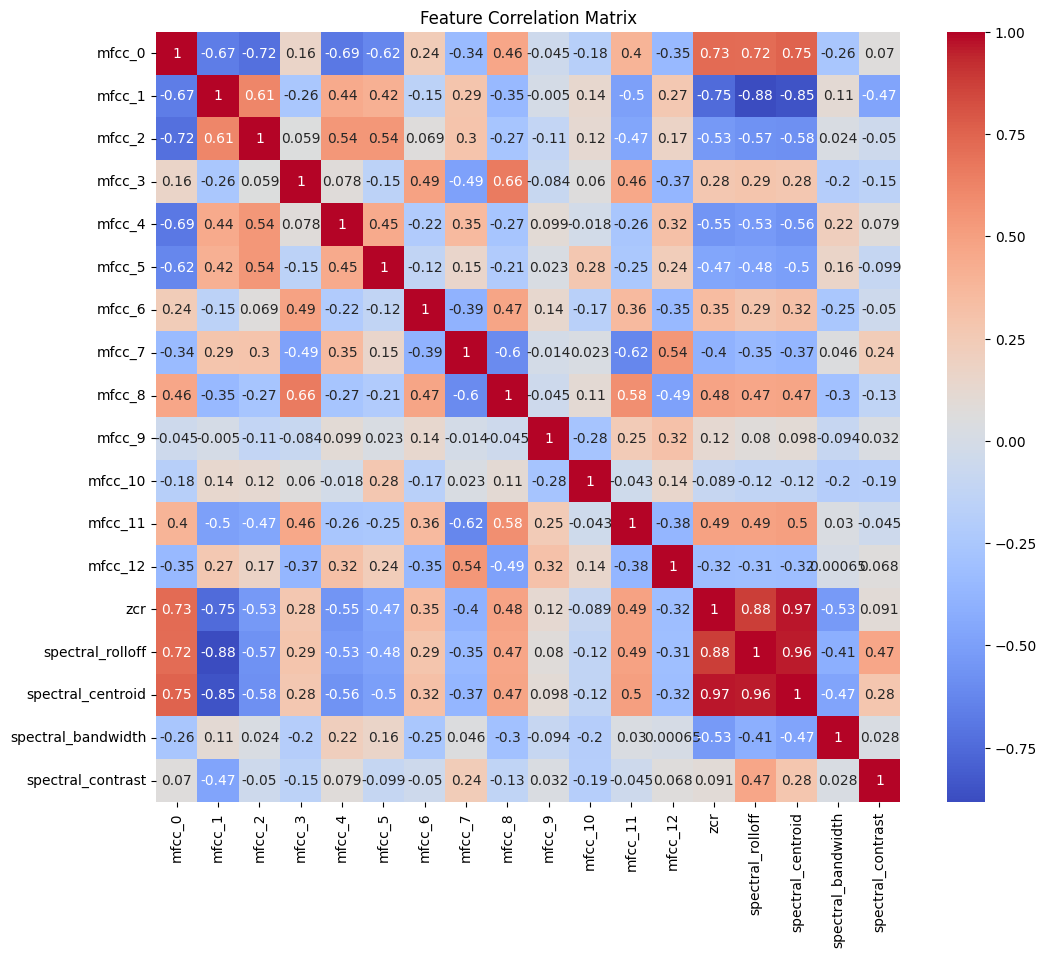

In [42]:
data_to_map = data.drop(['file_path', 'label'], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(data_to_map.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

**Mengubah fitur label yang bertipe kategorik menjadi data numerik nominal.**

In [43]:
kelas_num = [x for x in range(0, 7)]
kelas = data['label'].unique()
data['label'] = data['label'].replace(to_replace=kelas, value=kelas_num)

/tmp/ipykernel_30/3521798859.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace(to_replace=kelas, value=kelas_num)


In [44]:
data.head()

,file_path,label,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,zcr,spectral_rolloff,spectral_centroid,spectral_bandwidth,spectral_contrast
0,dataset_audio/disgust/YAF_cool_disgust.wav,0,-414.174805,83.774208,6.053292,21.471819,-20.958042,-1.229935,-3.379034,-16.890663,-3.287542,-2.196386,-9.936028,1.167771,-6.444130,0.145114,4352.398682,2522.832680,23.165423,2020.194887
1,dataset_audio/disgust/YAF_such_disgust.wav,0,-414.065155,35.342926,-0.902508,15.319044,-10.758162,0.599639,-7.669867,-9.958431,-4.176933,1.734143,-6.628315,0.586164,-5.965567,0.276206,5553.132218,3706.181756,22.585626,2045.454122
2,dataset_audio/disgust/YAF_loaf_disgust.wav,0,-389.576569,67.355965,-1.299663,13.635043,-16.633665,-1.246321,-4.563192,-14.913487,-9.660592,-3.935016,-6.260524,0.795046,-7.113515,0.188579,4900.341797,2923.226816,23.261979,2096.215087
3,dataset_audio/disgust/YAF_keg_disgust.wav,0,-390.250610,53.526520,-1.898674,28.933302,-4.077490,-10.880424,-13.930776,-10.125544,-8.995330,-4.342734,-9.926263,5.526996,-10.342362,0.181992,5284.040270,3134.387534,22.807202,2236.834102
4,dataset_audio/disgust/OAF_peg_disgust.wav,0,-449.097687,69.239906,5.952955,5.597575,14.205786,0.174597,-16.741772,-2.745457,-11.882961,4.558856,-13.865229,4.604545,2.761315,0.127358,4175.701349,2368.372343,24.260100,2232.221109


Membagi data untuk persiapan training, dengan data X untuk kolom-kolom yang digunakan training sedangkan Y sebagai label.

In [45]:
y = data['label']
X = data.drop(['file_path', 'label'], axis=1)

Normalisasi data X (training) agar meringankan proses komputasi dan menjaga ke-stabilan range antar data.

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
X = pd.DataFrame(standardized_data, columns=X.columns)

In [47]:
X.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,zcr,spectral_rolloff,spectral_centroid,spectral_bandwidth,spectral_contrast
0,-0.108253,1.109080,-0.041548,0.834831,-1.597306,-0.252502,0.680775,-1.014550,0.919793,-0.169727,0.333652,-0.177685,-0.279761,-0.014169,-0.054103,-0.133806,-1.316649,-1.286179
1,-0.106626,-1.058868,-0.485666,0.432015,-0.712709,0.006953,0.040345,-0.140781,0.791271,0.591930,1.043080,-0.265642,-0.173648,2.421125,1.276816,1.875730,-1.688000,-1.108070
2,0.256677,0.374144,-0.511024,0.321765,-1.222269,-0.254826,0.504033,-0.765338,-0.001143,-0.506639,1.121963,-0.234052,-0.428185,0.793272,0.553249,0.546134,-1.254806,-0.750143
3,0.246677,-0.244909,-0.549270,1.323327,-0.133319,-1.621055,-0.894130,-0.161844,0.094991,-0.585646,0.335746,0.481566,-1.144125,0.670905,0.978548,0.904723,-1.546084,0.241394
4,-0.626355,0.458475,-0.047954,-0.204440,1.452321,-0.053323,-1.313687,0.768375,-0.322285,1.139302,-0.509071,0.342063,1.761383,-0.344040,-0.249958,-0.396107,-0.615524,0.208866


**Split dataset.**

pada bagian ini digunakan untuk membagi data untuk training dan testing dengan perbandingan 80:20.

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [49]:
x_train.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,zcr,spectral_rolloff,spectral_centroid,spectral_bandwidth,spectral_contrast
2593,-1.679357,-0.353045,1.227598,-0.078780,0.790730,1.785627,1.170585,-0.163750,-0.513074,-0.202204,-0.025492,0.190881,0.291227,-0.010511,0.171579,-0.009640,0.479465,0.845831
1733,0.385102,1.070253,-1.100900,-1.691139,0.456909,0.021786,-0.582598,1.819535,-0.208865,0.302157,0.128039,-1.100486,0.227370,-0.603006,-0.612431,-0.595361,-0.156053,-0.312149
1975,-0.817686,1.276766,-0.551723,-0.236732,0.332677,-0.027420,-1.983020,0.970302,-0.843505,-0.236433,1.755698,-1.384994,1.409102,-1.003108,-1.412537,-1.195573,0.199373,-1.941741
1213,1.355227,-1.597197,-0.895532,1.175143,-0.538798,-0.159899,-0.367123,-0.679665,1.292991,-1.577074,0.185759,1.533623,-2.143928,1.312895,0.960707,1.135657,0.349317,-0.125698
1094,0.238044,-0.696018,-0.951382,-0.647953,0.662904,-0.061300,-2.806413,1.380797,-0.737907,-0.384907,0.859038,0.461743,0.869717,-0.635629,-0.129448,-0.260716,1.222032,0.674364


# Build Model

**Membuat model memakai Random Forest**

Pada bagian ini kita akan melatih model Random Forest pada set data train, tanpa menggunakan tuning hyperparameter.

In [50]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()

rand_forest.fit(x_train, y_train)

RandomForestClassifier()

**Cek score model random forest**

setelah melatih model maka sekarang cek score akurasi model tersebut.

# Evaluasi model: Random Forest

In [51]:
rand_forest.score(x_test, y_test)

0.9625

**Confusion Matriks untuk performa Random Forest terhadap data test**

Agar kita dapat mengetahui secara lebih jelas mengenai performa model Random forest, kita dapat menggunakan confusion matriks guna melihat data selain akurasi semisal f1-score, recall, dan precision.

hasil performa model dapat disimpulkan bahwa :


1. Model ini punya akurasi 96%, artinya 96% dari total prediksi untuk semua kelas benar.
2. Precision dan Recall rata-rata di setiap kelas sekitar 96% atau lebih tinggi, menunjukkan model cukup baik dalam mengenali setiap emosi dengan baik, dengan tingkat kesalahan yang rendah.
3. F1-score juga konsisten tinggi untuk setiap emosi, khususnya untuk kelas seperti fear, angry, dan sad, yang mencapai hampir 98-99%, menunjukkan keseimbangan baik antara precision dan recall.


Classification Report:
              precision    recall  f1-score   support

     disgust       0.94      0.96      0.95        75
        fear       1.00      0.96      0.98        79
       angry       0.96      1.00      0.98        80
       happy       0.93      0.93      0.93        80
    surprise       0.94      0.92      0.93        83
         sad       0.97      1.00      0.99        75
     neutral       1.00      0.98      0.99        88

    accuracy                           0.96       560
   macro avg       0.96      0.96      0.96       560
weighted avg       0.96      0.96      0.96       560

Confusion Matrix:


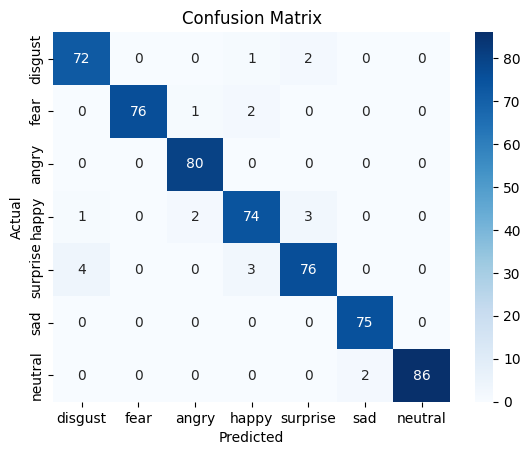

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi hasil tes
y_pred = rand_forest.predict(x_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred,  target_names=kelas))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=kelas,
            yticklabels=kelas)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Fungsi untuk pre-processing data test. (misal uji coba dengan data secara individu atau batch)**

In [53]:
"""
    Fungsi untuk pre-processing data testing seblum dilakukan prediksi dengan model.
"""

def load_test(file_path):
    #load audio file
    y, sr = librosa.load(file_path)
    #membuat plot gelombang sinyal 
    librosa.display.waveshow(y, sr=sr)
    #mengektrak fitur
    features = extract_feature(file_path)
    #normalisasi data fitur
    norm = scaler.transform([features])
    return norm

**Uji coba satu data uji**

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


5 : sad


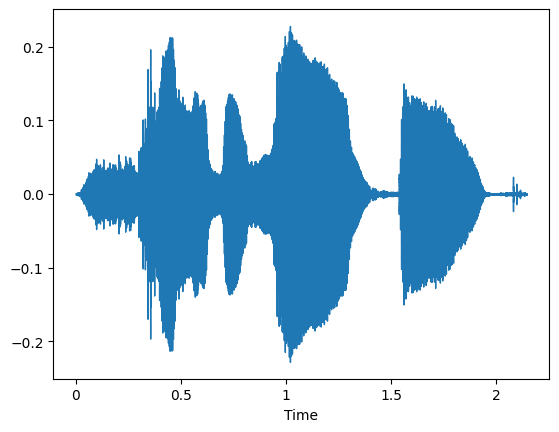

In [54]:
coba = load_test(data['file_path'][2016])

print(f"{data['label'][2016]} : {kelas[data['label'][2016]]}")

**Hasil Prediksi Random Forest**

kemudian kita akan memprediksi data sample tersebut. pada contoh ini model dapat berhasil memprediksi dengan benar yaitu label `sad`

In [55]:
"""
    hasil prediksi benar sesuai label data yang sebenarnya.
"""

pred = rand_forest.predict(coba)
kelas[pred]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['sad'], dtype=object)

In [56]:
import pickle

# Simpan model ke dalam file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rand_forest, file)

# Build Model : Dense Neural Network

**Membuat model Neural Network DNN (Dense Neural Network) dengan Hyperparameter Tuning**

Fungsi untuk membuat model DNN untuk di-`tuning` dengan Bayesian Opt. Neural network ini menerima input shape dengan besar (18,) sesuai dengan jumlah kolom data frame kita.

variabel params nanti akan diisi dengan hasil tuning dan kemudian di-assign ke masing

In [66]:
"""
    membuat template model DNN yang akan dicari hyperparameter nya dengan Bayesian Optimisation.
"""

def create_model(params):
    inputs = tf.keras.layers.Input(shape=(18,))
    x = tf.keras.layers.Dense(int(params['unitA']), activation="relu")(inputs)
    x = tf.keras.layers.Dense(int(params['unitB']), activation="relu")(x)
    x = tf.keras.layers.Dense(int(params['unitC']), activation="relu")(x)
    x = tf.keras.layers.Dense(int(params['unitD']), activation="relu")(x)
    outputs = tf.keras.layers.Dense(7, activation="softmax")(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_bento")
    optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    
    return model

**Fungsi untuk mencari Hyperparameter dengan Bayesian Optimisation.**

In [67]:
from hyperopt import fmin, tpe, hp, Trials
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(patience=3, monitor="val_accuracy", mode="max")

"""
    Fungsi untuk mencari hyperparameter optimisation
"""
def hyperparameter_tuning(params):
    #panggil fungsi untuk membuat model.
    model = create_model(params)
    #jalankan training model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=20, batch_size=int(params['batch_size']), callbacks=[callback], verbose=0)
    #ambil val_acc sebagai indikator
    val_acc = history.history['val_accuracy'][-1]
    #dikali -1 agar memaksimalkan val_accuracy
    return -val_acc

**lakukan iterasi pencarian hyperparameter yang paling optimal.**

Pada bagian mulai untuk pencarian hyperparameter yaitu jumlah unit tiap layer, learning rate dan batch_size. nilai ini akan dicari pada ruang pencarian (`space`), hasil dari iterasi pencarian ini yaitu nilai tiap hyperparameter dengan tingkat `val_accuracy` yang paling tinggi.

# Hyperparameter Tuning DNN

In [68]:
import tensorflow as tf

"""
    ruang pencarian hyperparameter.
"""

space = {
    'unitA': hp.quniform('unitA', 16, 128, 1),
    'unitB': hp.quniform('unitB', 16, 128, 1),
    'unitC': hp.quniform('unitC', 16, 128, 1),
    'unitD': hp.quniform('unitD', 16, 128, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),  # Range antara sekitar 0.0001 dan 0.1
    'batch_size': hp.quniform('batch_size', 16, 64, 1),
}

# Menyimpan hasil tiap iterasi
trials = Trials()

# Menjalankan optimasi
best = fmin(fn=hyperparameter_tuning, space=space, algo=tpe.suggest, max_evals=30, trials=trials)

print("Best hyperparameters:", best)

  0%|          | 0/30 [00:00<?, ?trial/s, best loss=?]

I0000 00:00:1731333745.764245     124 service.cc:145] XLA service 0x7b9648009760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731333745.764308     124 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731333750.473406     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100%|██████████| 30/30 [03:52<00:00,  7.75s/trial, best loss: -0.9678571224212646]
Best hyperparameters: {'batch_size': 18.0, 'learning_rate': 0.008046198691715889, 'unitA': 71.0, 'unitB': 33.0, 'unitC': 105.0, 'unitD': 43.0}


**Train model DNN dengan hyperparameter yang telah di-`tuning`**

In [69]:
model = create_model(best)
model.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=20, batch_size=int(best['batch_size']), callbacks=[callback], verbose=1)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6491 - loss: 0.9486 - val_accuracy: 0.9089 - val_loss: 0.2781
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9293 - loss: 0.2126 - val_accuracy: 0.9482 - val_loss: 0.1337
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9518 - loss: 0.1341 - val_accuracy: 0.9714 - val_loss: 0.0983


**Uji Coba dengan data uji**

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
6 : neutral
neutral


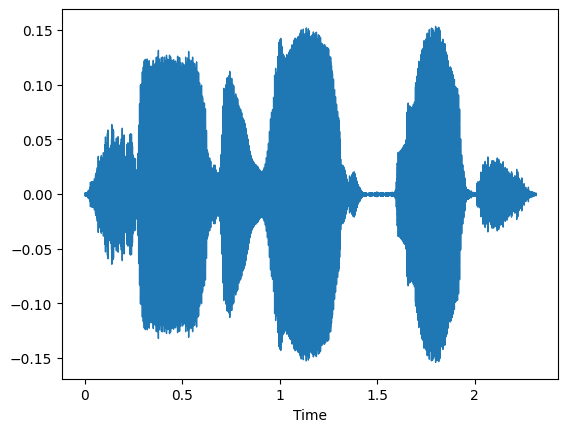

In [70]:
test_nn = load_test(data['file_path'][2450])
pred_nn = model.predict(test_nn)
print(f"{data['label'][2450]} : {kelas[data['label'][2450]]}")
print(kelas[np.argmax(pred_nn)])

**Menampilkan hasil confusion matriks DNN terhadap data test.**


1. Model mencapai akurasi sebesar 0.97 atau 97%, menunjukkan performa yang sangat baik pada seluruh kelas emosi.
2. Precision: Semua kelas memiliki precision di atas 0.94, artinya model cukup akurat dalam mengidentifikasi setiap emosi tanpa banyak kesalahan prediksi ke kelas lain.
3. Recall: Recall untuk semua kelas juga di atas 0.92, menunjukkan bahwa model mampu menangkap sebagian besar instance untuk setiap kelas.
4. F1-Score: Dengan nilai F1-score antara 0.94 hingga 0.99, model memiliki keseimbangan yang baik antara precision dan recall di semua kelas.


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

     disgust       0.96      0.99      0.97        75
        fear       0.99      0.96      0.97        79
       angry       0.94      1.00      0.97        80
       happy       0.99      0.99      0.99        80
    surprise       0.97      0.92      0.94        83
         sad       0.97      0.97      0.97        75
     neutral       0.98      0.98      0.98        88

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



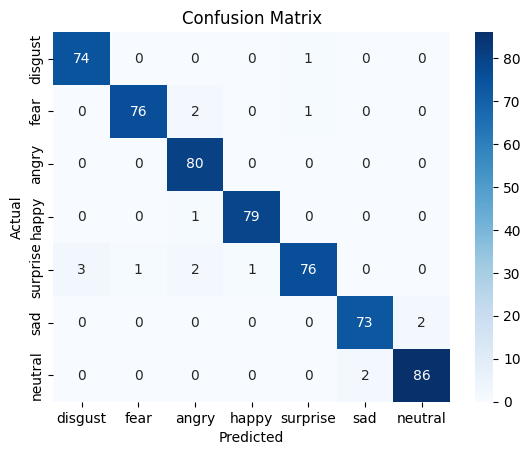

In [71]:
from sklearn.metrics import classification_report
import numpy as np

# Melakukan prediksi pada data uji
y_pred_proba = model.predict(x_test)  # Menghasilkan probabilitas untuk setiap kelas
y_pred = np.argmax(y_pred_proba, axis=1)  # Konversi ke kelas prediksi (0, 1, 2, dst.)

y_test_labels = y_test

# Menghitung dan menampilkan classification report
print(classification_report(y_test_labels, y_pred, target_names=kelas))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=kelas,
            yticklabels=kelas)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Save model (.h5)**

In [72]:
model.save("modelAudio.h5")
#size only 180KB

# Kesimpulan

**Akurasi**

`Random Forest`: Akurasi 0.96 atau 96%.
`Neural Network`: Akurasi 0.97 atau 97%.
Maka dari itu Neural Network memiliki akurasi sedikit lebih tinggi dibandingkan dengan Random Forest, menunjukkan bahwa model Neural Network lebih mampu menangkap pola dalam data ini.

**Recall, F1-Score, Precision**
`Random Forest` menunjukkan performa baik namun sedikit lebih bervariasi di beberapa kelas (misalnya, pada kelas "happy" dan "surprise").
`Neural Network` memiliki performa lebih konsisten di berbagai kelas, dengan hampir semua kelas memiliki precision, recall, dan F1-score di atas 0.94, serta lebih tinggi pada kelas yang lebih sulit seperti "surprise."